# Problem Statement

1. A sizeable department has to be maintained, for the purposes of recruiting new talent
2. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
3. Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. 
4. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. 
5. Also, they want to know which of these variables is most important and needs to be addressed right away.


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, minmax_scale
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr

In [4]:
df=pd.read_csv("general_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


## Dropping null and duplicated values from the dataset


In [6]:
display(df.duplicated())
display(df.isnull().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
df.drop_duplicates()
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

# Points to be noted in the above dataset we have few columns whose mean, median, mode calculations are not required at all, such column include:
1. 8 columns that store categorical data.
2. Columns that have constant value for each record and doesn't show any variation in the stored data like 'Standard hours' and    'employeeCount' column. 

##  Plotting Correlation matrix of the dataset

In [11]:
def plotcorr(df_temp):
    x,y=len (df_temp.columns), len (df_temp.columns)
    fig, ax=plt.subplots(figsize=(x,y))
    sns.heatmap(df_temp.corr(), ax=ax, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

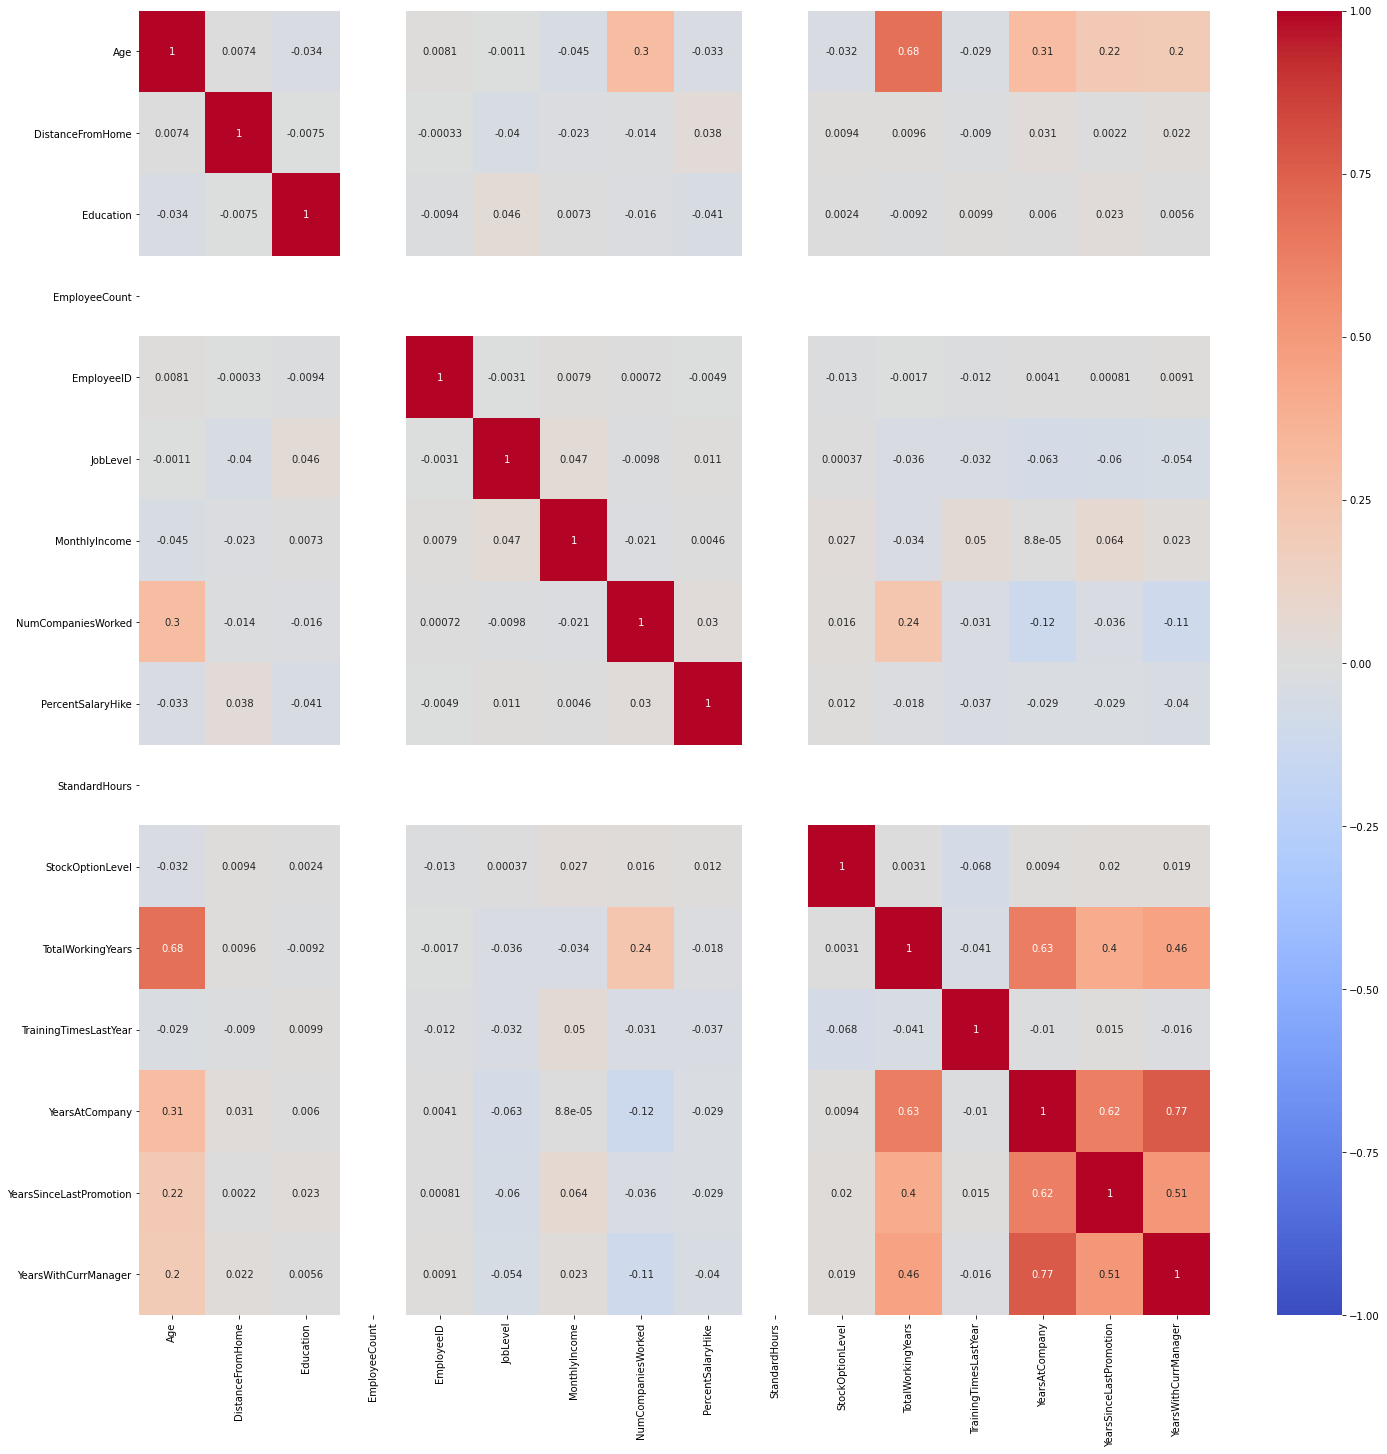

In [12]:
plotcorr(df)

In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
df1=df[['Age', 'DistanceFromHome', 'Education','JobLevel', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

## Computing mean of specified columns

In [15]:
mean=df1.mean().to_frame(name='Mean')
mean

,Mean
Age,36.933364
DistanceFromHome,9.198996
Education,2.912369
JobLevel,2.063898
MonthlyIncome,65061.702419
NumCompaniesWorked,2.693291
PercentSalaryHike,15.210634
TotalWorkingYears,11.290278
TrainingTimesLastYear,2.798266
YearsAtCompany,7.010497


## Computing median of specified column

In [16]:
median= df1.median().to_frame(name='Median')
median

,Median
Age,36.0
DistanceFromHome,7.0
Education,3.0
JobLevel,2.0
MonthlyIncome,49190.0
NumCompaniesWorked,2.0
PercentSalaryHike,14.0
TotalWorkingYears,10.0
TrainingTimesLastYear,3.0
YearsAtCompany,5.0


In [17]:
mode=df1.mode()
mode=mode.T
mode.columns=['Mode']
mode

,Mode
Age,35.0
DistanceFromHome,2.0
Education,3.0
JobLevel,1.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0


## Computing Variance of specified columns

In [18]:
variance=df1.var().to_frame(name='Variance')
variance

,Variance
Age,8.348974e+01
DistanceFromHome,6.569744e+01
Education,1.050068e+00
JobLevel,1.223490e+00
MonthlyIncome,2.222397e+09
NumCompaniesWorked,6.239165e+00
PercentSalaryHike,1.341762e+01
TotalWorkingYears,6.061739e+01
TrainingTimesLastYear,1.662558e+00
YearsAtCompany,3.756894e+01


## Computing Skewness of specified columns

In [19]:
skew=df1.skew().to_frame(name='Skewness')
skew

,Skewness
Age,0.413048
DistanceFromHome,0.955517
Education,-0.288977
JobLevel,1.021797
MonthlyIncome,1.367457
NumCompaniesWorked,1.029174
PercentSalaryHike,0.819510
TotalWorkingYears,1.115419
TrainingTimesLastYear,0.551818
YearsAtCompany,1.764619


## Computing standard deviation of specified columns

In [20]:
stddev=df1.std().to_frame(name='Std. Deviation')
stddev

,Std. Deviation
Age,9.137272
DistanceFromHome,8.105396
Education,1.024728
JobLevel,1.106115
MonthlyIncome,47142.310175
NumCompaniesWorked,2.497832
PercentSalaryHike,3.663007
TotalWorkingYears,7.785717
TrainingTimesLastYear,1.289402
YearsAtCompany,6.129351


## Computing Kurtosis of specified columns

In [21]:
kurtosis=df1.kurt().to_frame(name='Kurtosis')
kurtosis

,Kurtosis
Age,-0.409517
DistanceFromHome,-0.230691
Education,-0.565008
JobLevel,0.388189
MonthlyIncome,0.990836
NumCompaniesWorked,0.014307
PercentSalaryHike,-0.306951
TotalWorkingYears,0.909316
TrainingTimesLastYear,0.494215
YearsAtCompany,3.930726


## Computing IQR of specified columns

In [22]:
iqr=(df1.quantile(.75)-df1.quantile(.25)).to_frame(name='IQR')
iqr

,IQR
Age,13.0
DistanceFromHome,12.0
Education,2.0
JobLevel,2.0
MonthlyIncome,54680.0
NumCompaniesWorked,3.0
PercentSalaryHike,6.0
TotalWorkingYears,9.0
TrainingTimesLastYear,1.0
YearsAtCompany,6.0


## Analysis Table

In [23]:
df_Info=pd.concat([mean,median,mode,variance,stddev,iqr,skew,kurtosis],axis=1)
df_Info

,Mean,Median,Mode,Variance,Std. Deviation,IQR,Skewness,Kurtosis
Age,36.933364,36.0,35.0,8.348974e+01,9.137272,13.0,0.413048,-0.409517
DistanceFromHome,9.198996,7.0,2.0,6.569744e+01,8.105396,12.0,0.955517,-0.230691
Education,2.912369,3.0,3.0,1.050068e+00,1.024728,2.0,-0.288977,-0.565008
JobLevel,2.063898,2.0,1.0,1.223490e+00,1.106115,2.0,1.021797,0.388189
MonthlyIncome,65061.702419,49190.0,23420.0,2.222397e+09,47142.310175,54680.0,1.367457,0.990836
NumCompaniesWorked,2.693291,2.0,1.0,6.239165e+00,2.497832,3.0,1.029174,0.014307
PercentSalaryHike,15.210634,14.0,11.0,1.341762e+01,3.663007,6.0,0.819510,-0.306951
TotalWorkingYears,11.290278,10.0,10.0,6.061739e+01,7.785717,9.0,1.115419,0.909316
TrainingTimesLastYear,2.798266,3.0,2.0,1.662558e+00,1.289402,1.0,0.551818,0.494215
YearsAtCompany,7.010497,5.0,5.0,3.756894e+01,6.129351,6.0,1.764619,3.930726


## Inference of analysis
1. All the above variables show positive skewness; while Age and Mean_Distance_From_Home are leptokurtic and all other variables are platykurtic
2. The Mean_Monthly_Income IQR is at 54k Suggesting company wide attrition across all income bands
3. Mean age forms a near normal distribution with 13 years of IQR

In [24]:
def plotBox(df_temp):
    fig=plt.figure(figsize=(25,15))
    for i, col in enumerate(df_temp.columns):
        plt.subplot(3,4,i+1)
        plt.boxplot(df_temp[col])
        plt.title(col)
        
    plt.show()
    
def plotHist(df_temp):
    fig=plt.figure(figsize=(25,15))
    for i, col in enumerate(df_temp.columns):
        plt.subplot(3,4,i+1)
        plt.hist(df_temp[col])
        plt.title(col)
        
    plt.show()    

## Outliers

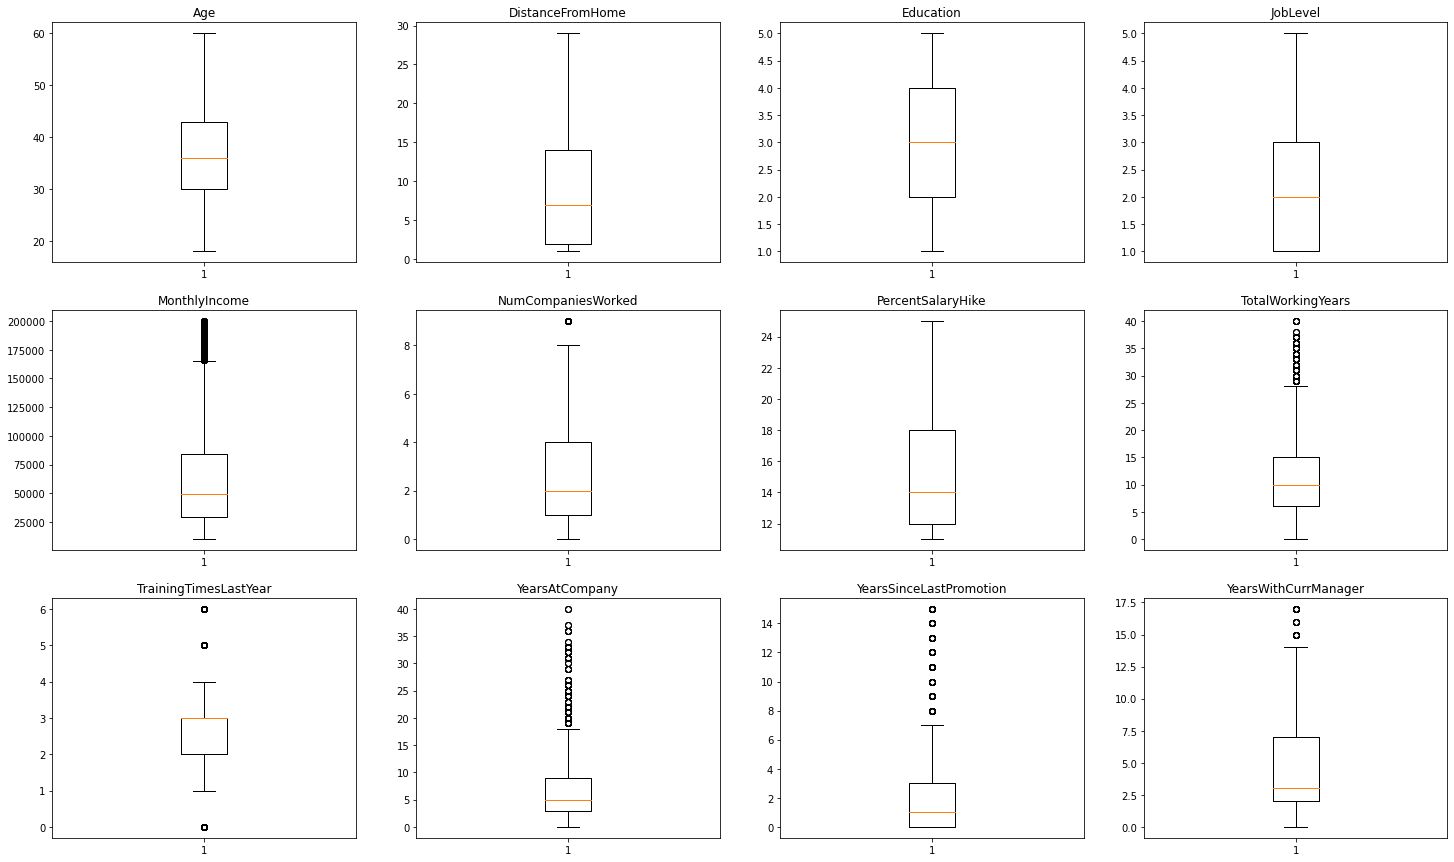

In [25]:
plotBox(df1)

1. Age, Education are normally Distributed
2. DistanceFromHome, JobLevel, PercentSalaryHike are rightly skewed with no outliers
3. Rest all the other columns are rightly skewed with several outliers

## Histogram
These plots gives us visualization about the data variation and gives an adea of data symmetry and peakness.

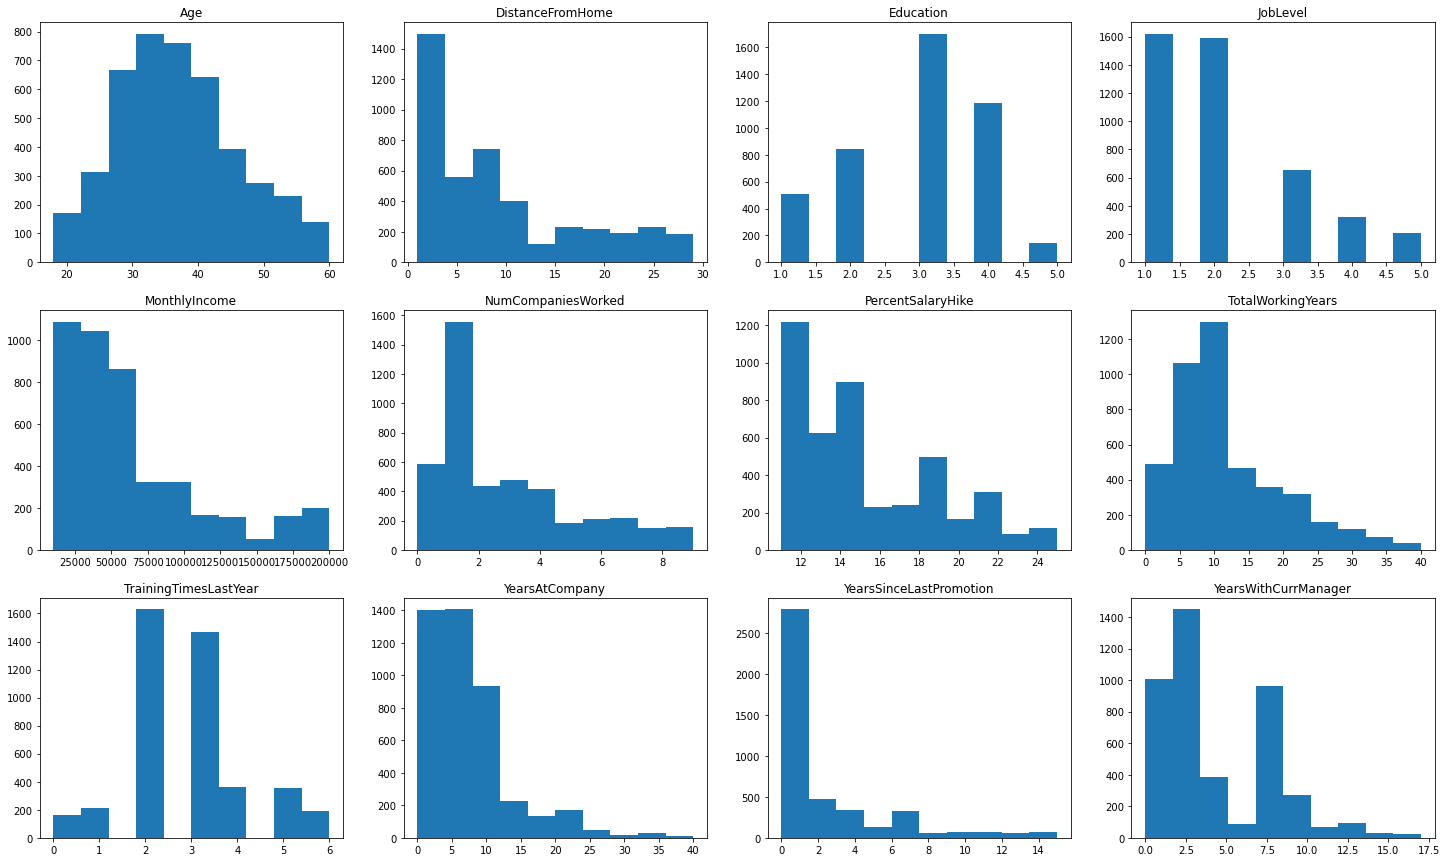

In [26]:
plotHist(df1)

1. Age, Education, TrainingTimeLastYear data are symmetric and has its peak in middle i.e Mesokurtic
2. Rest of the data are unsymmetric and has its peak at the left side i.e positively skewed.

## Statistical Test

In [27]:
df2=df[['Attrition','DistanceFromHome', 'MonthlyIncome','TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]
df2

,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,No,6,131160,1.0,1,0
1,Yes,10,41890,6.0,5,4
2,No,17,193280,5.0,5,3
3,No,2,83210,13.0,8,5
4,No,10,23420,9.0,6,4
...,...,...,...,...,...,...
4404,No,4,35390,6.0,6,5
4405,No,5,60290,10.0,3,2
4406,No,2,26790,10.0,3,2
4407,No,25,37020,5.0,4,2
